In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

import functions.handy_functions as hf
import functions.parse_data as parse

from sklearn.decomposition import PCA

/tmp/ipykernel_59292/787061.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-03-08 12:40:36.837351: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-08 12:40:36.872184: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 12:40:36.

In [2]:

data_clear=parse.parse('cloudrm2_clear.dat')
data_ice=parse.parse('cloudrm2_ice.dat')
data_mixed=parse.parse('cloudrm2_mixed.dat')
data_water=parse.parse('cloudrm2_water.dat')

data_all=pd.concat([data_water,data_mixed,data_ice])
data_all=data_all.drop(columns=['Cloud_B01','Clear_B01'])

data_all=hf.dumb_down_surface(data_all) #Create simpler labels for surface descriptio 

In [17]:
data_ice

,Cloud_B01,Cloud_B02,Cloud_B03,Cloud_B04,Cloud_B05,Cloud_B06,Cloud_B07,Cloud_B08,Cloud_B09,Cloud_B10,...,Clear_B13,Sat_Zenith_Angle,Sun_Zenith_Angle,Azimuth_Diff_Angle,COT,Cloud_Type,Profile_ID,GOT,Water_Vapor,Surface_Desc
0,0.79666,0.76682,0.66774,0.73136,0.73943,0.76337,0.77839,0.74715,0.79052,0.53438,...,0.83360,12.85,77.58,101.06,9.052,6,1552,0.122,1.05,water-frost-none
1,0.38276,0.37501,0.40269,0.33162,0.44711,0.84856,0.97329,0.86043,1.00437,0.32206,...,0.20672,11.91,41.43,50.34,4.353,6,6986,0.119,2.33,vegetation-tree-taxodium
2,0.39663,0.38512,0.43212,0.32864,0.63441,0.79104,0.81079,0.76722,0.82745,0.25670,...,0.25815,6.80,77.63,135.60,1.063,6,792,0.124,0.82,vegetation-shrub-agave
3,0.40010,0.37774,0.34621,0.33673,0.43193,0.79164,0.79654,0.78860,0.80282,0.56467,...,0.53680,13.45,78.27,139.27,2.774,6,4348,0.123,0.10,vegetation-tree-bambusa
4,0.66248,0.65627,0.63890,0.63916,0.77843,0.88742,0.89917,0.84944,0.90321,0.33937,...,0.58262,11.74,62.92,104.58,16.646,6,832,0.124,0.84,vegetation-tree-quercus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.51623,0.50276,0.47871,0.46967,0.54358,0.86892,0.88053,0.84585,0.88959,0.53423,...,0.20496,11.67,68.27,77.28,6.957,6,746,0.123,0.55,vegetation-tree-cedrus
49996,0.55749,0.54352,0.50403,0.51628,0.54872,0.79783,0.83753,0.75490,0.86111,0.33029,...,0.25496,1.17,69.27,42.49,11.012,6,6557,0.128,3.11,vegetation-shrub-heteromeles
49997,0.83671,0.82433,0.78127,0.80659,0.83291,0.94575,0.94647,0.91819,0.94143,0.81650,...,0.62394,9.23,52.66,57.87,42.509,6,131,0.118,0.37,vegetation-tree-acer
49998,0.41376,0.41150,0.47313,0.38625,0.64327,0.70789,0.75344,0.67580,0.78012,0.19547,...,0.45868,12.41,78.54,26.20,2.115,6,7597,0.127,4.04,vegetation-shrub-salvia


In [3]:
data_all.Surface_Desc.value_counts()

Surface_Desc
vegetation-tree-quercus         16254
vegetation-tree-pinus            7602
vegetation-shrub-ceanothus       7037
vegetation-shrub-baccharis       6915
vegetation-shrub-calocedrus      3590
                                ...  
soil-alfisol-fragiboralf          177
soil-mollisol-paleustoll          177
soil-aridisol-torripsamment       167
rock-igneous-feslic               166
soil-entisol-quartzipsamment      159
Name: count, Length: 139, dtype: int64

In [4]:
data_all.Surface_Desc_Dumb.value_counts()

Surface_Desc_Dumb
vegetation                     106097
rock                            15807
nonphotosyntheticvegetation     11663
water                            8651
soil                             7782
Name: count, dtype: int64

In [5]:
data_all.columns

Index(['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05', 'Cloud_B06',
       'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10', 'Cloud_B11',
       'Cloud_B12', 'Cloud_B13', 'Clear_B02', 'Clear_B03', 'Clear_B04',
       'Clear_B05', 'Clear_B06', 'Clear_B07', 'Clear_B08', 'Clear_B09',
       'Clear_B10', 'Clear_B11', 'Clear_B12', 'Clear_B13', 'Sat_Zenith_Angle',
       'Sun_Zenith_Angle', 'Azimuth_Diff_Angle', 'COT', 'Cloud_Type',
       'Profile_ID', 'GOT', 'Water_Vapor', 'Surface_Desc',
       'Surface_Desc_Dumb'],
      dtype='object')

(array([ 5833.,  1445.,  2509.,  3636.,  9955., 10129., 17358., 19924.,
        23696., 55515.]),
 array([0.03727 , 0.131359, 0.225448, 0.319537, 0.413626, 0.507715,
        0.601804, 0.695893, 0.789982, 0.884071, 0.97816 ]),
 <BarContainer object of 10 artists>)

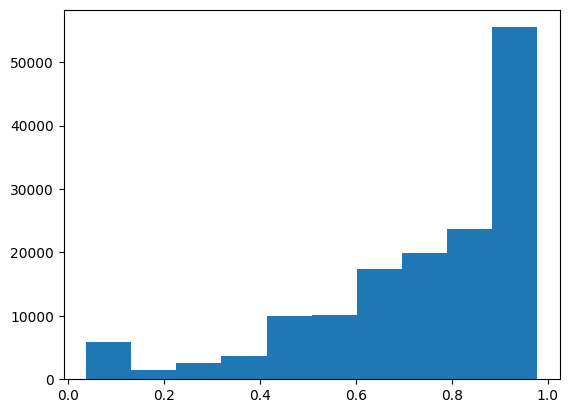

In [6]:
plt.hist(data_all['Clear_B12'])

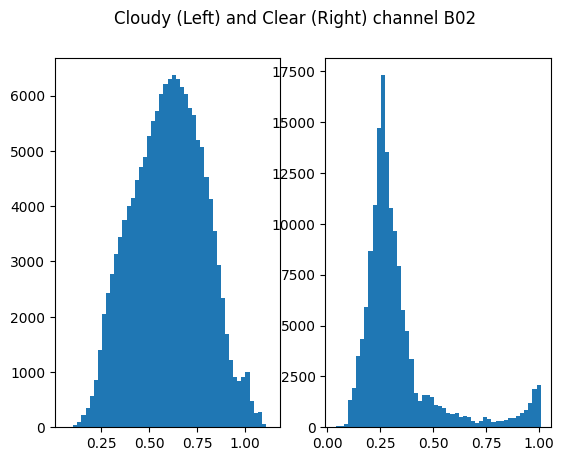

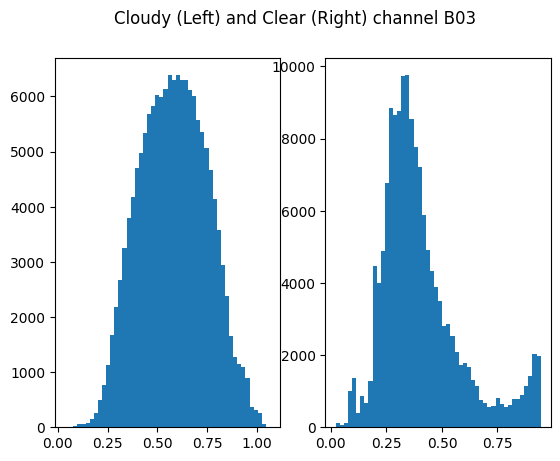

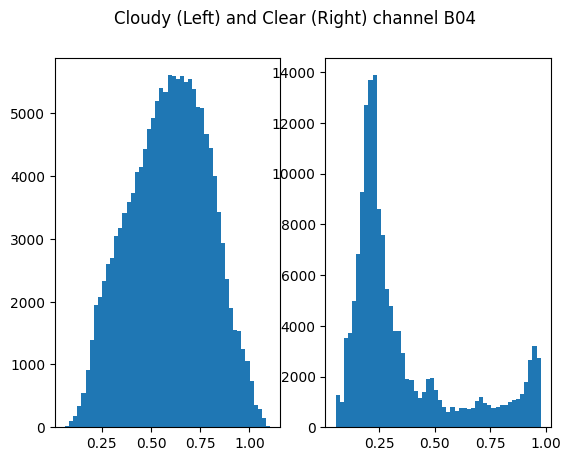

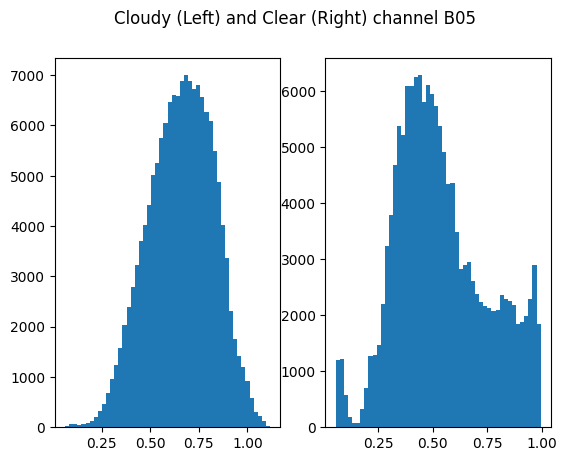

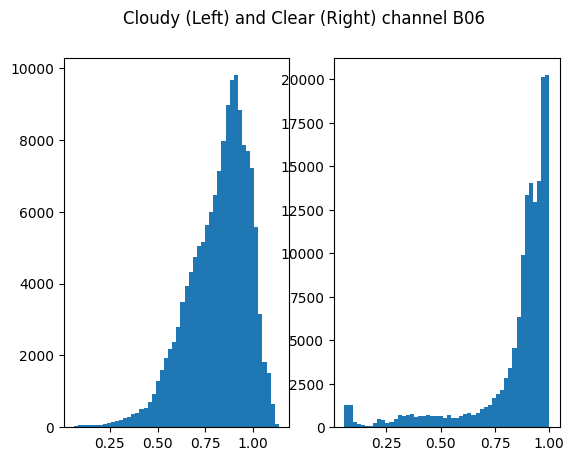

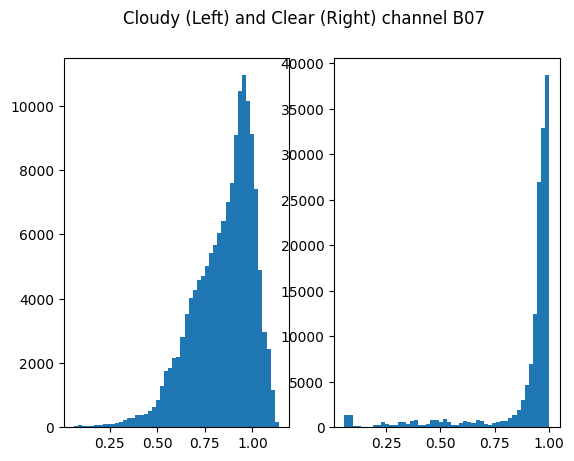

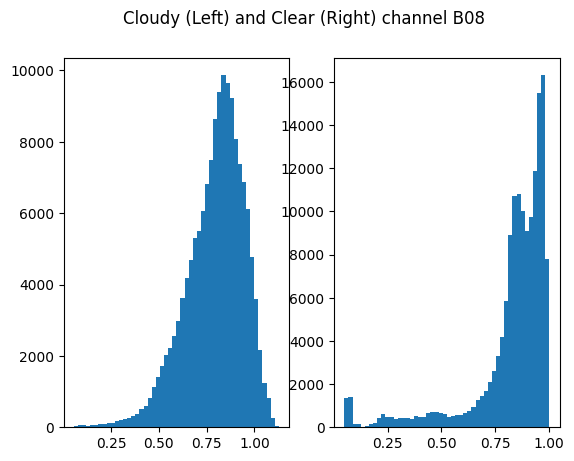

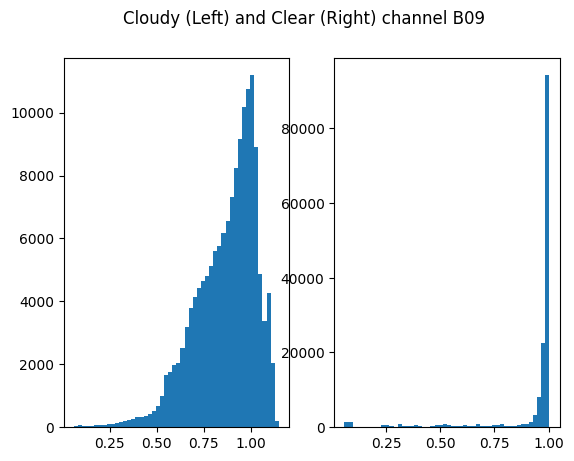

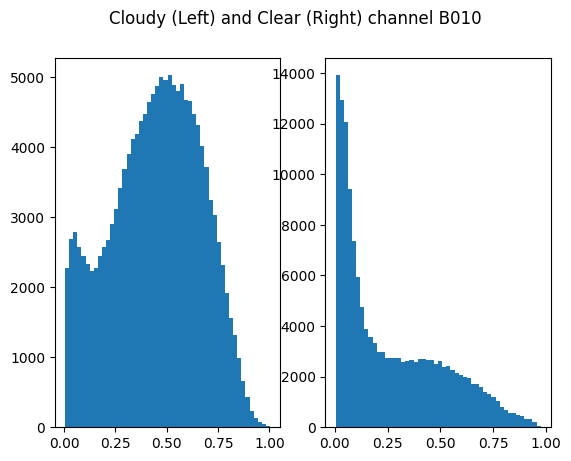

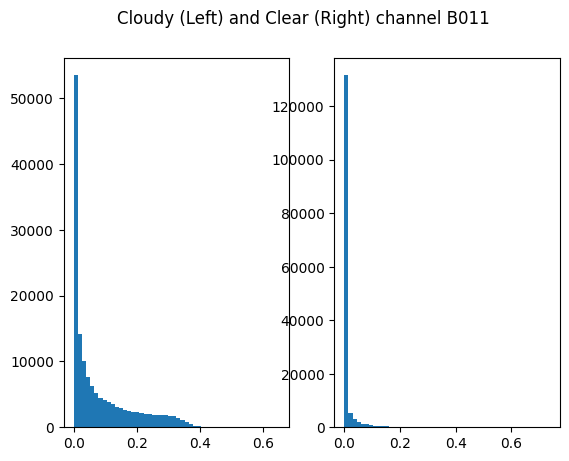

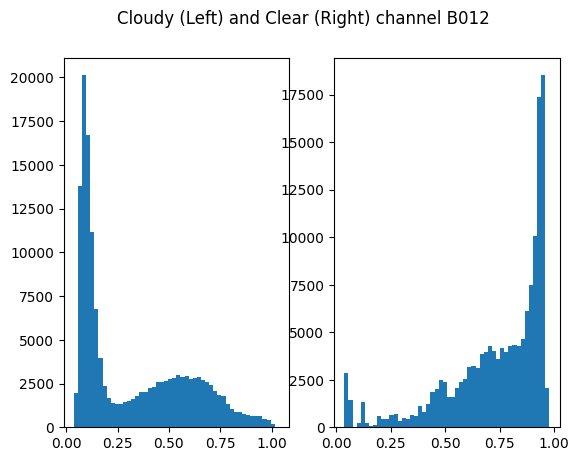

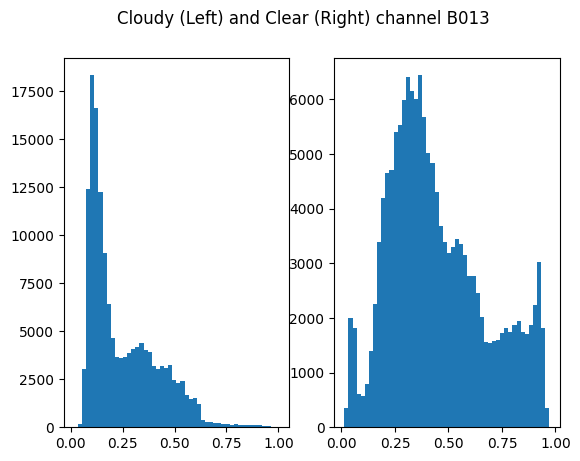

In [7]:
for i in range(2,14):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle("Cloudy (Left) and Clear (Right) channel B0"+str(i))
    if i<=9:
        ax1.hist(data_all['Cloud_'+'B0'+str(i)],bins=50)
        ax2.hist(data_all['Clear_'+'B0'+str(i)],bins=50)
    else:
        ax1.hist(data_all['Cloud_'+'B'+str(i)],bins=50)
        ax2.hist(data_all['Clear_'+'B'+str(i)],bins=50)

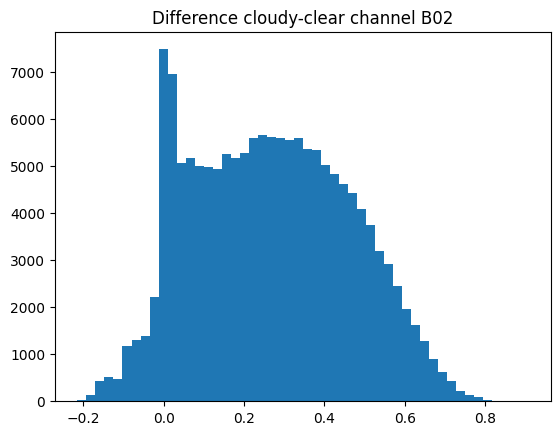

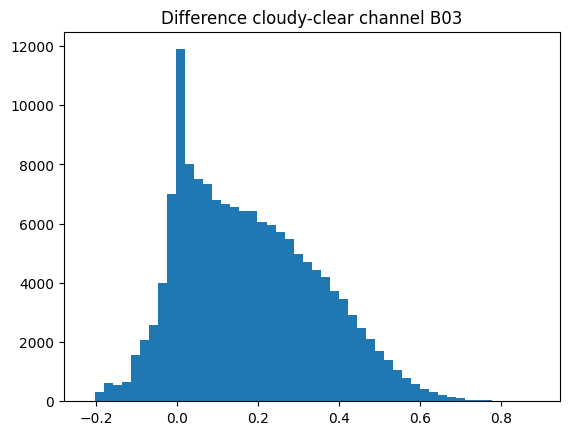

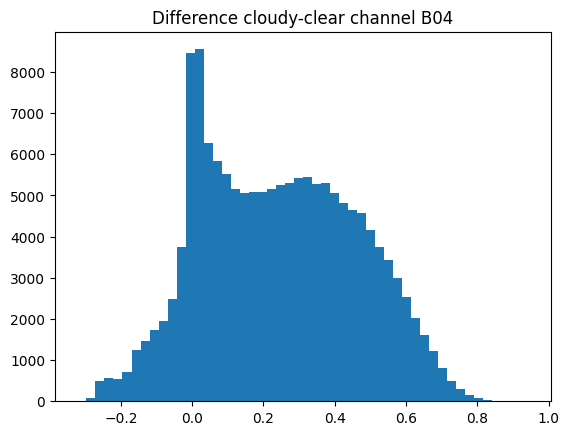

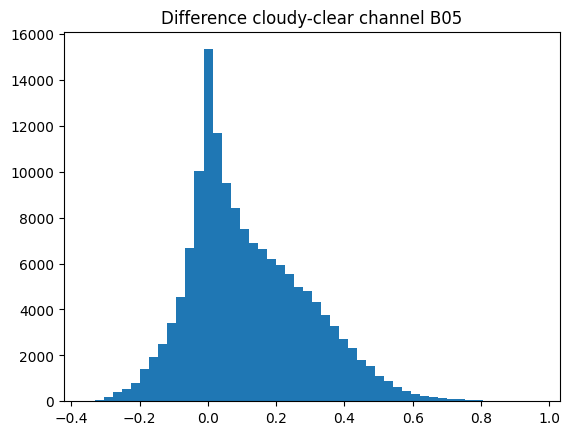

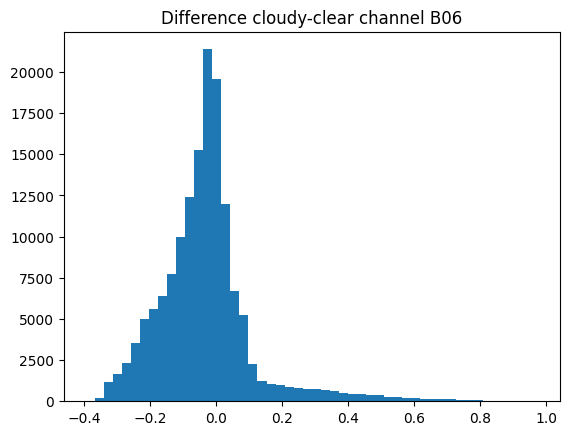

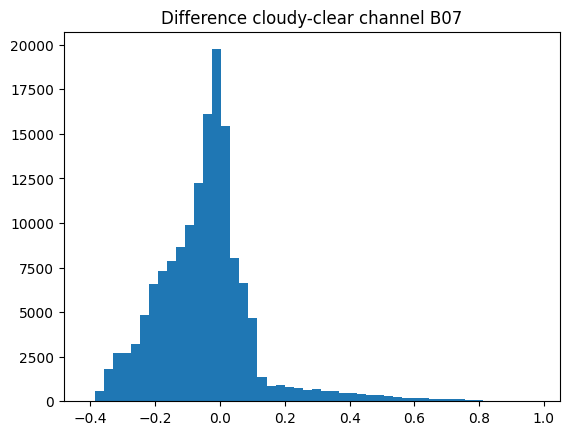

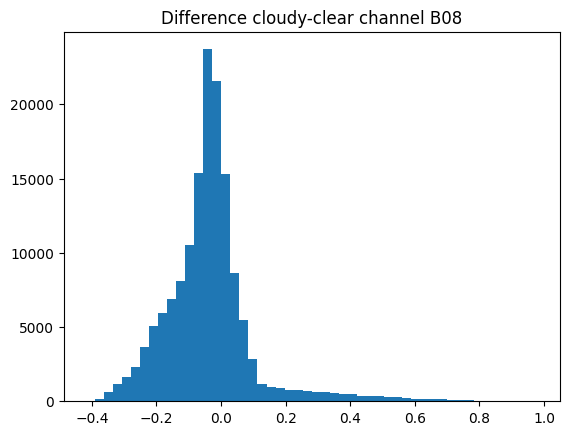

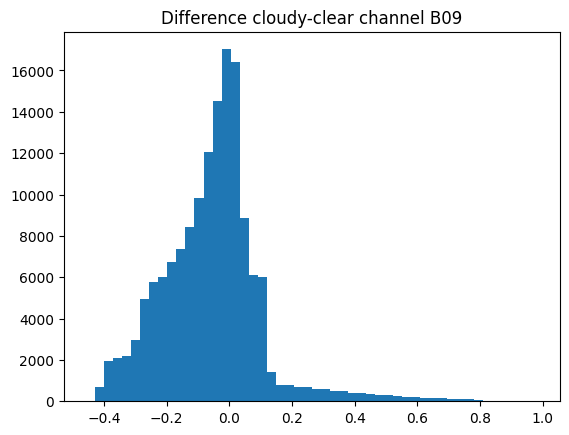

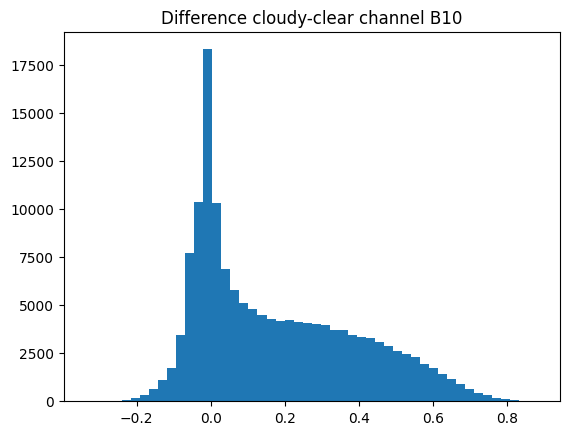

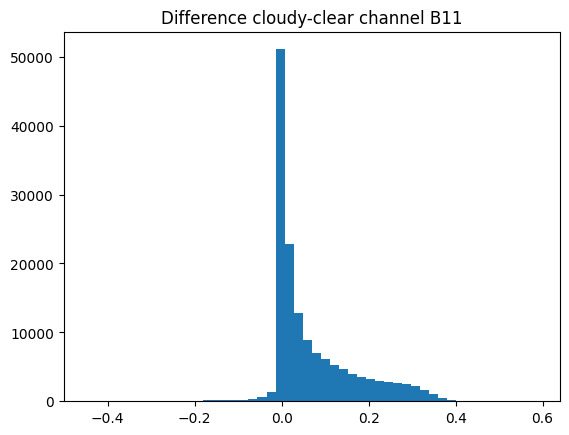

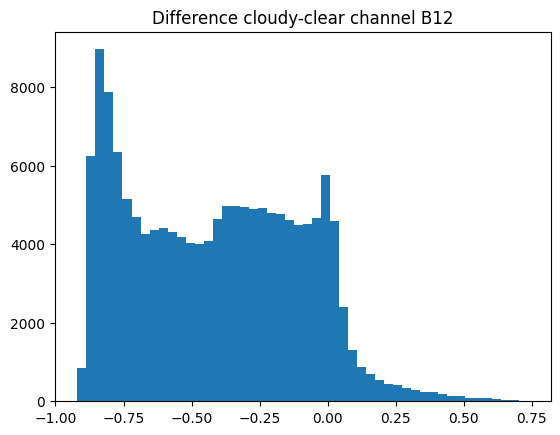

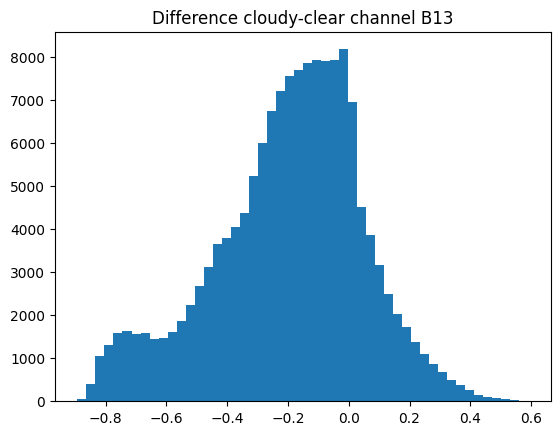

In [8]:
for i in range(2,14):
    
    if i<=9:
        plt.hist(data_all['Cloud_'+'B0'+str(i)]-data_all['Clear_'+'B0'+str(i)],bins=50)
        plt.title("Difference cloudy-clear channel B0"+str(i))
        plt.show()
    else:
        plt.hist(data_all['Cloud_'+'B'+str(i)]-data_all['Clear_'+'B'+str(i)],bins=50)
        plt.title("Difference cloudy-clear channel B"+str(i))
        plt.show()

## Histograms divided by surface description

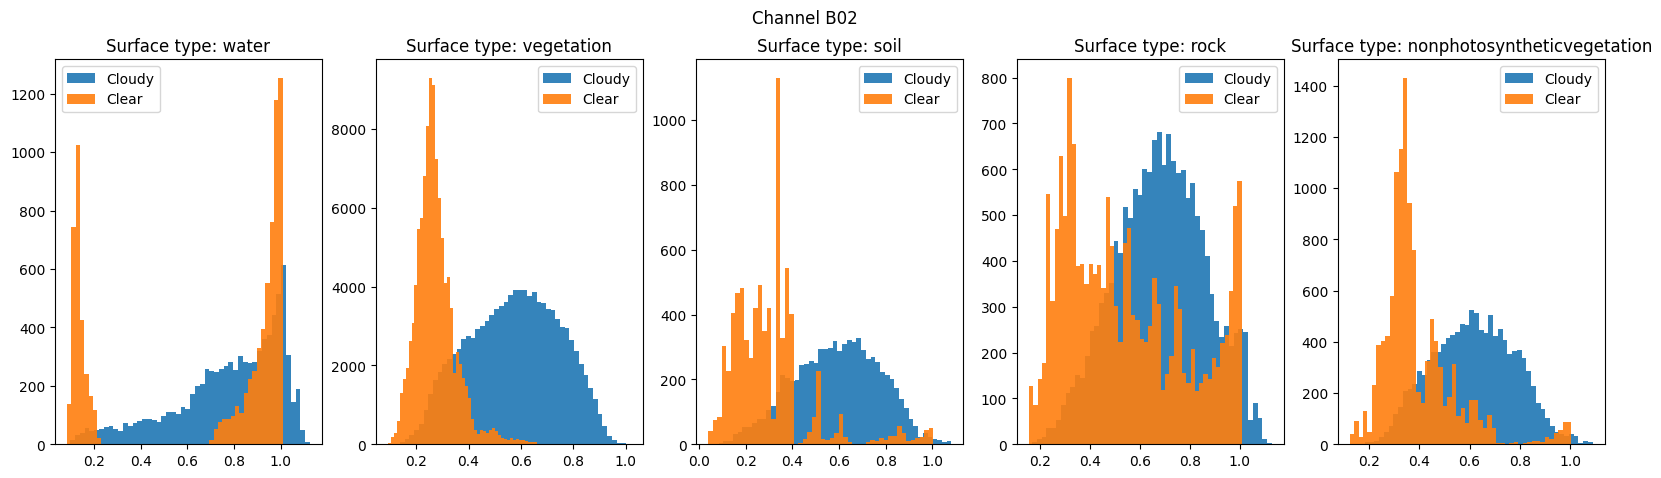

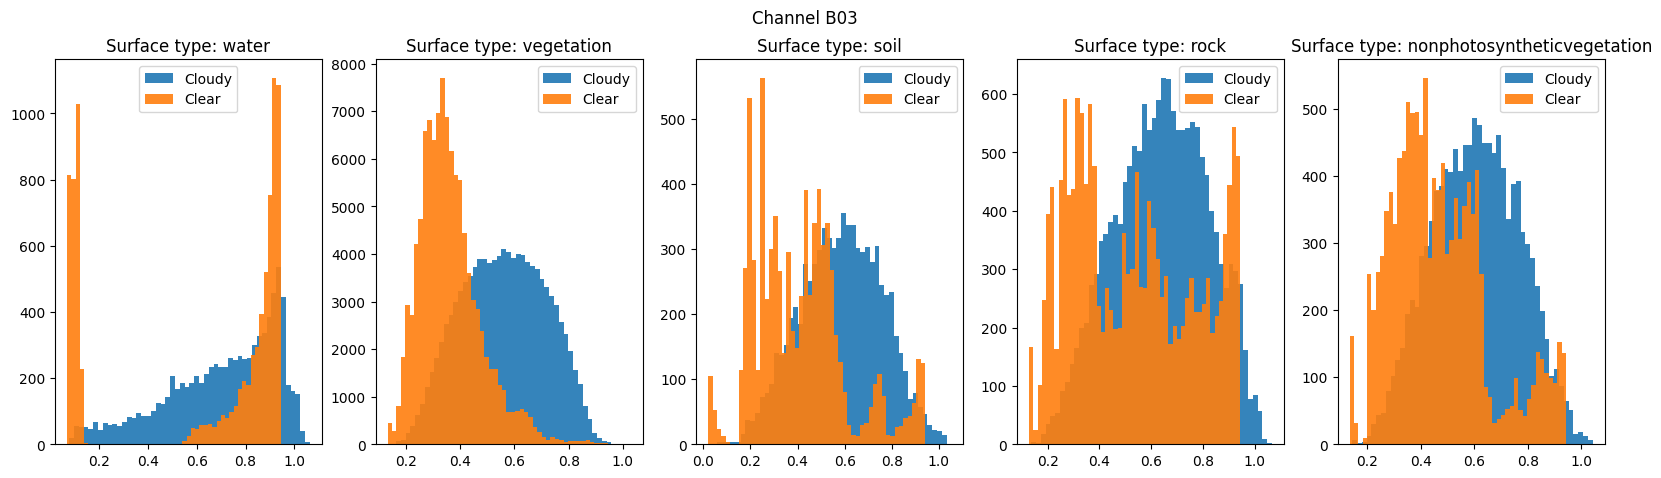

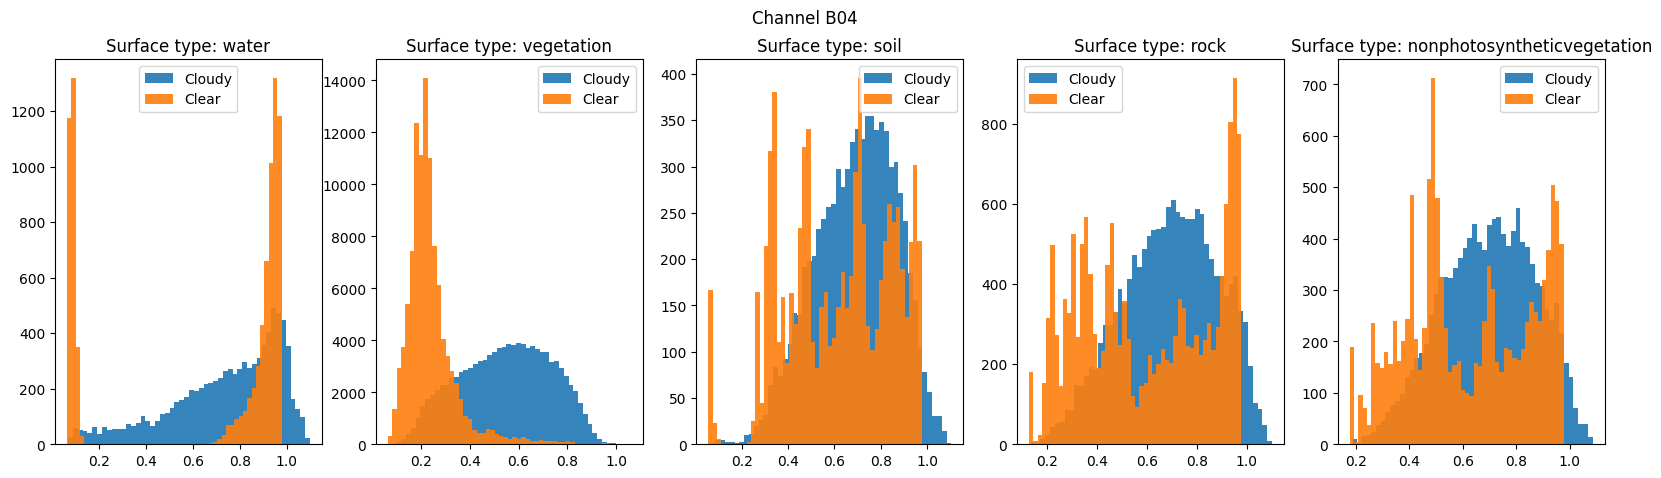

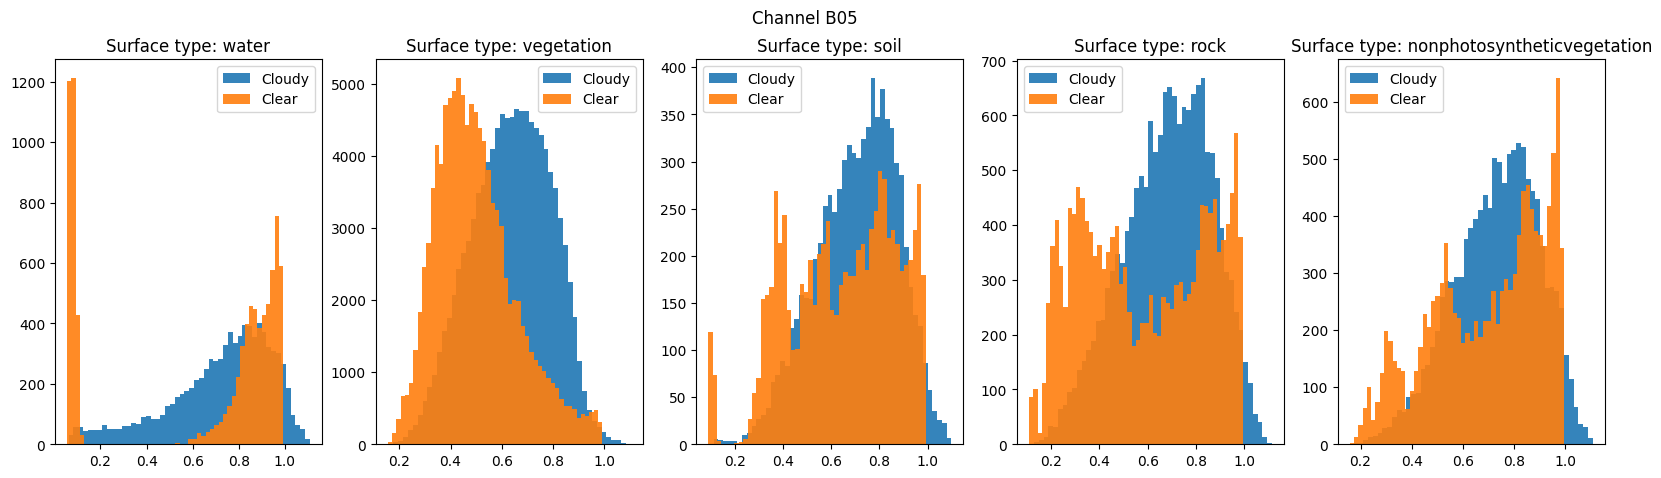

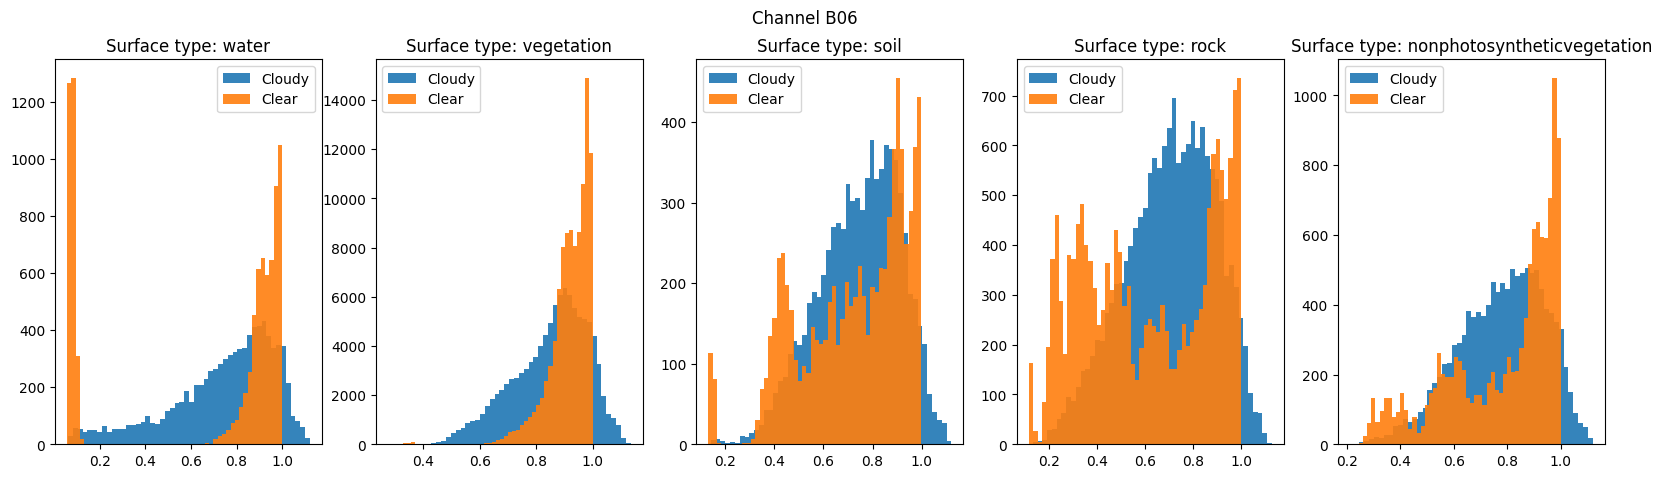

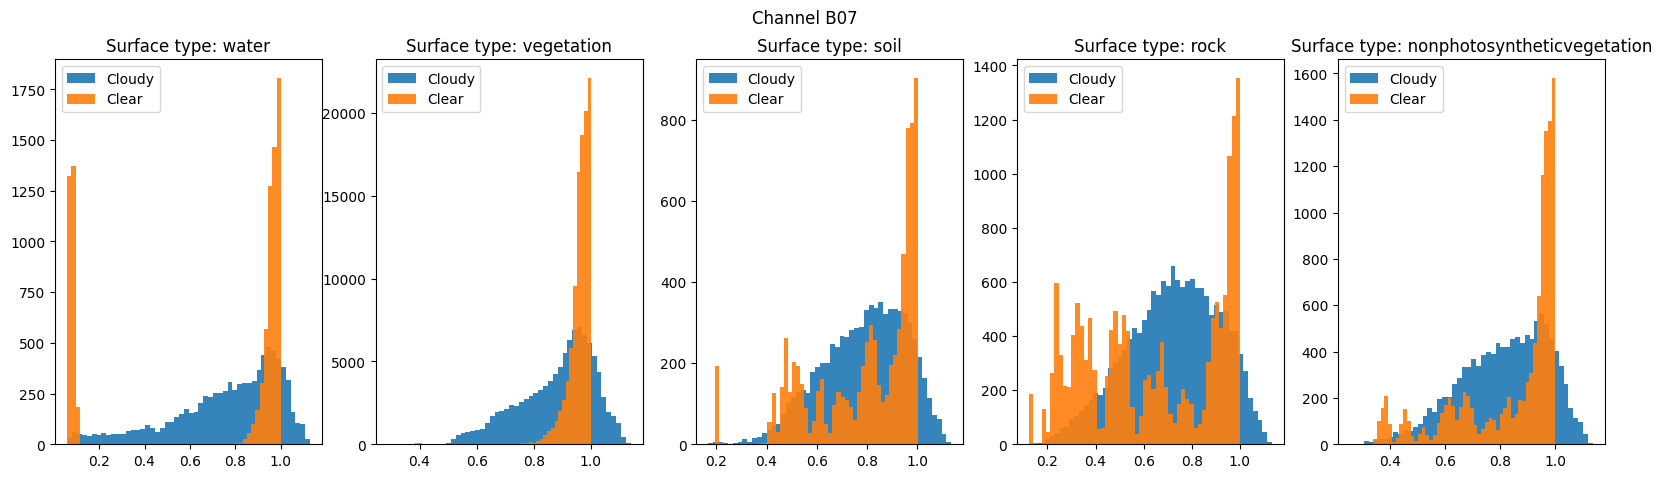

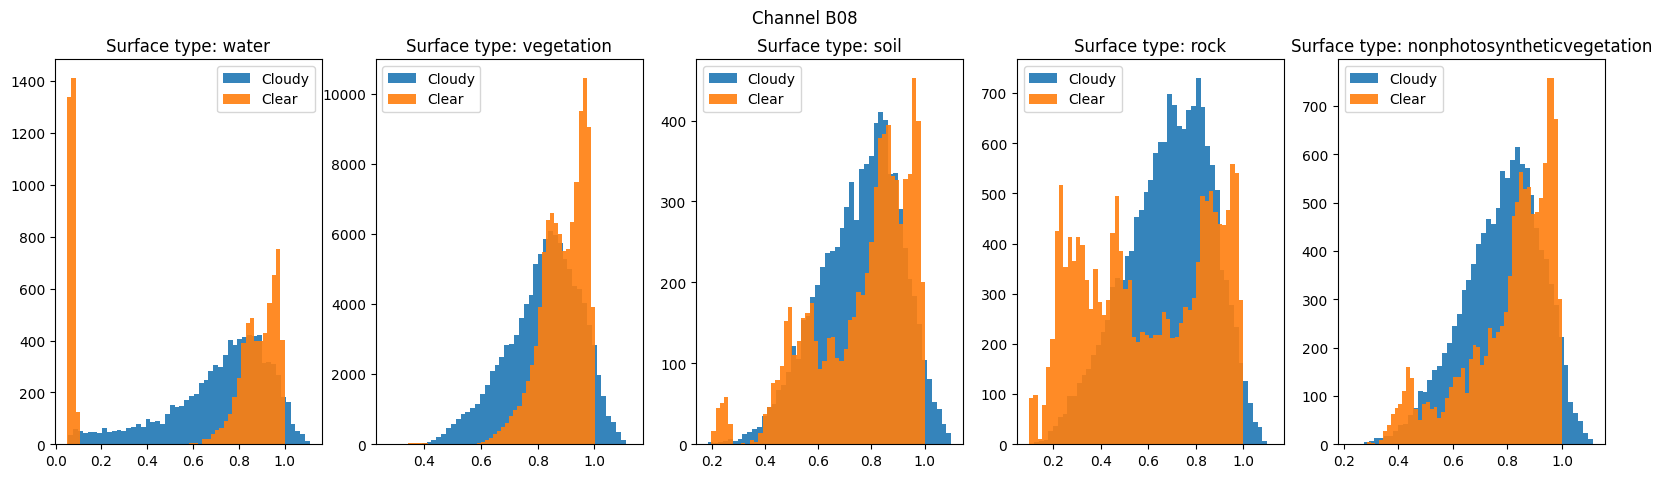

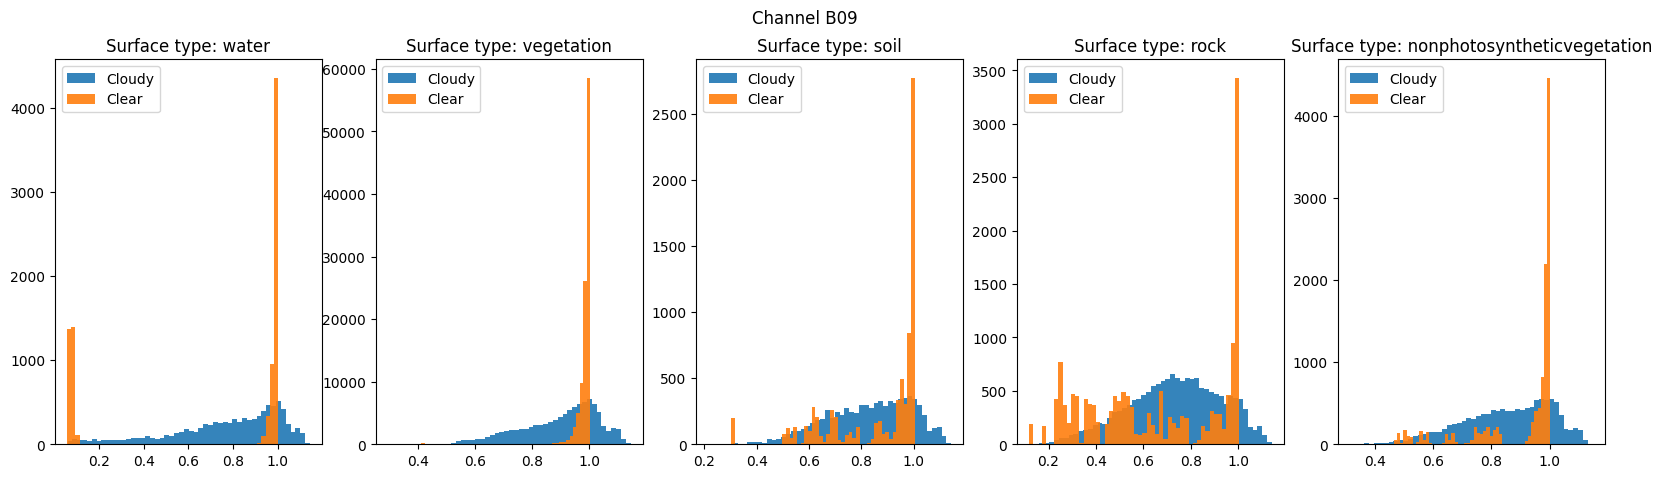

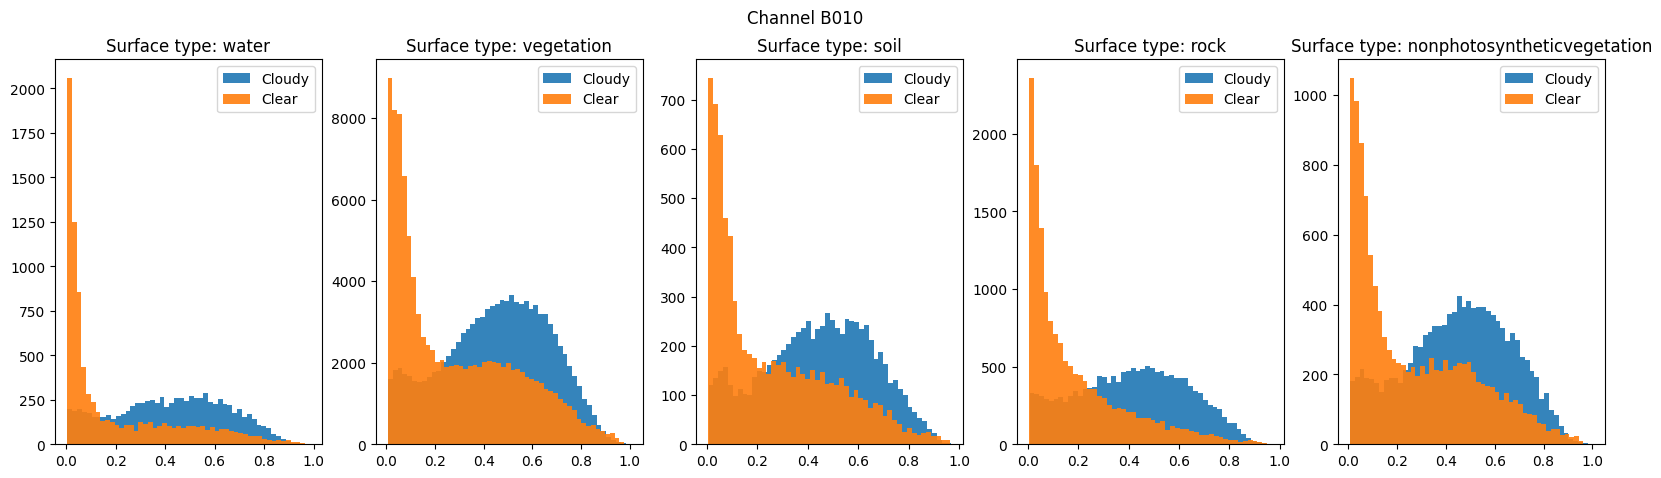

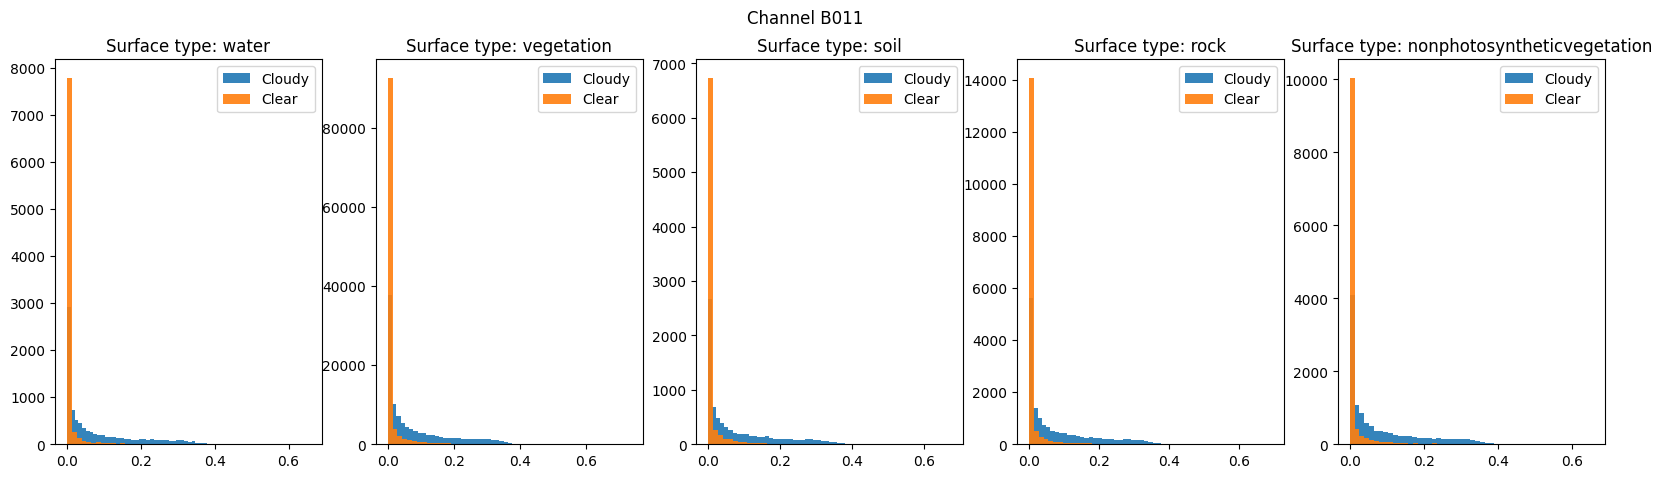

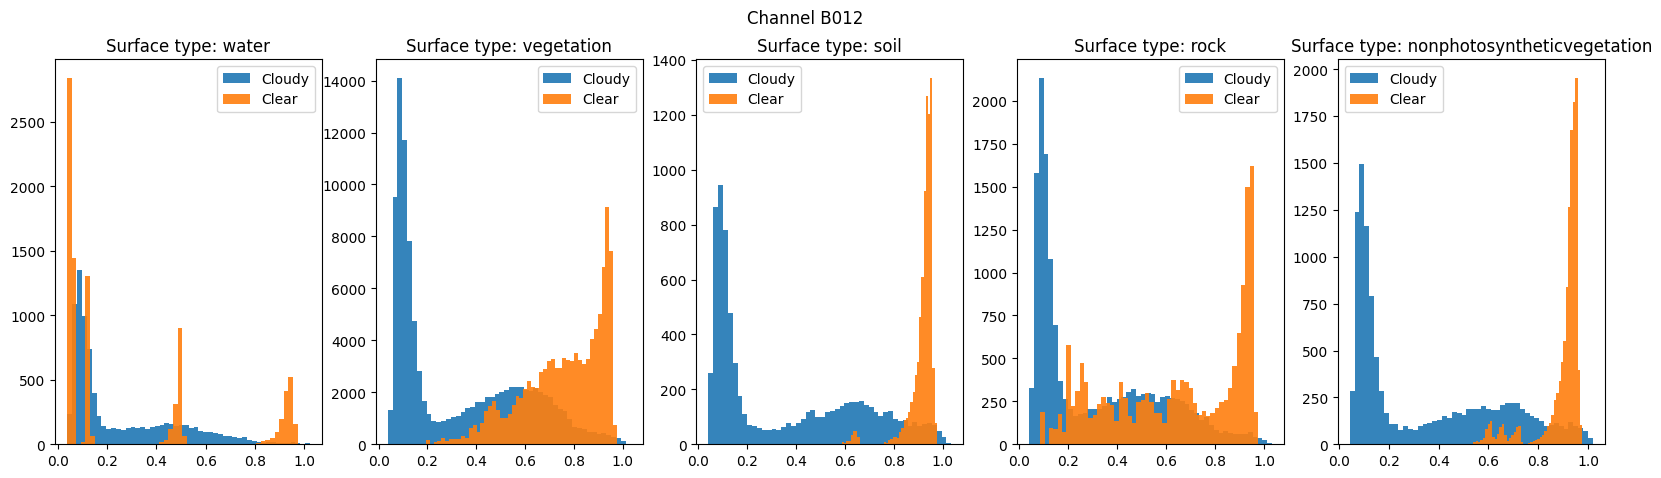

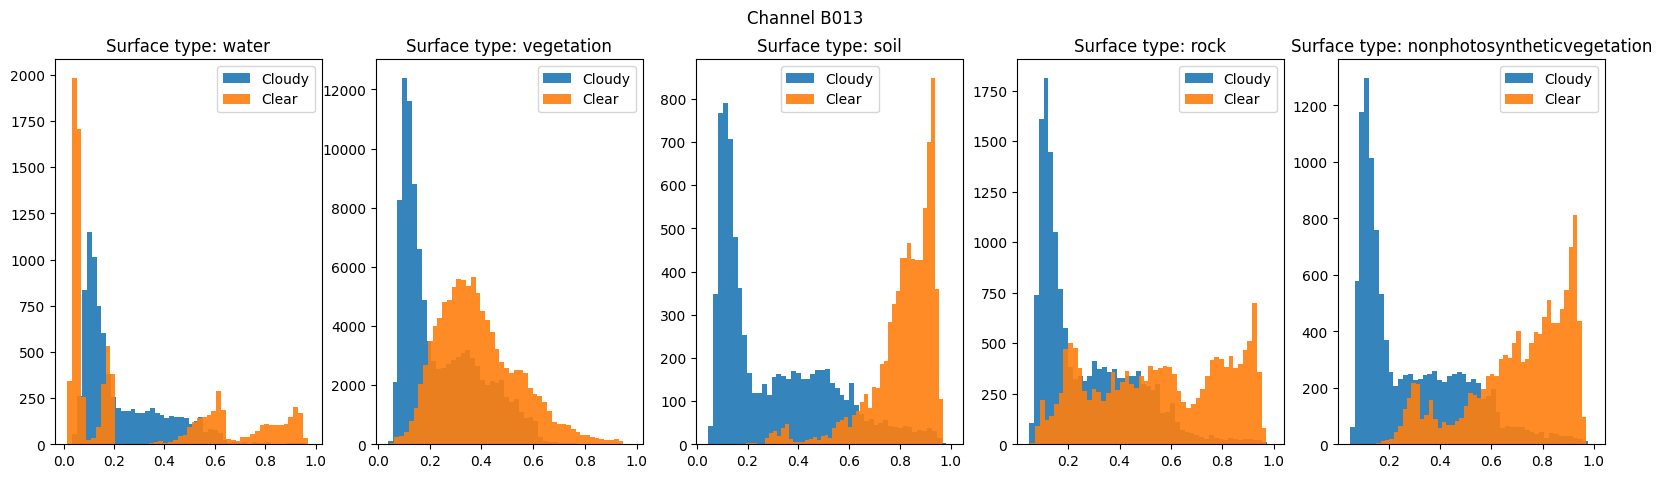

In [9]:
surface_labels=data_all.Surface_Desc_Dumb.unique()
plt.rcParams["figure.figsize"] = [20, 5]
for i in range(2,14):
    fig, axs = plt.subplots(1,len(surface_labels))
    
    if i<=9:
        fig.suptitle("Channel B0"+str(i))
        for j,label in enumerate(surface_labels):
            df_tmp=data_all[data_all['Surface_Desc_Dumb']==label]

            axs[j].hist(df_tmp['Cloud_'+'B0'+str(i)],bins=50,alpha=0.9)
            axs[j].hist(df_tmp['Clear_'+'B0'+str(i)],bins=50,alpha=0.9)
            axs[j].title.set_text('Surface type: '+label)
            axs[j].legend(['Cloudy','Clear'])

    else:
        fig.suptitle("Channel B0"+str(i))
        for j,label in enumerate(surface_labels):
            df_tmp=data_all[data_all['Surface_Desc_Dumb']==label]

            axs[j].hist(df_tmp['Cloud_'+'B'+str(i)],bins=50,alpha=0.9)
            axs[j].hist(df_tmp['Clear_'+'B'+str(i)],bins=50,alpha=0.9)
            axs[j].title.set_text('Surface type: '+label)
            axs[j].legend(['Cloudy','Clear'])

In [10]:
tm=data_all[data_all['Surface_Desc_Dumb']=='vegetation']
tm.Clear_B13.value_counts()

Clear_B13
0.31364    11
0.28035    11
0.36714    11
0.31792    11
0.38341    10
           ..
0.29989     1
0.39272     1
0.27136     1
0.63164     1
0.63050     1
Name: count, Length: 48585, dtype: int64

In [11]:
cloudy_columns=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05',
                'Cloud_B06', 'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10',
                'Cloud_B11', 'Cloud_B12', 'Cloud_B13']

clear_columns=['Clear_B02','Clear_B03', 'Clear_B04', 
               'Clear_B05', 'Clear_B06', 'Clear_B07','Clear_B08', 
               'Clear_B09', 'Clear_B10', 'Clear_B11', 'Clear_B12',
                'Clear_B13']

channel_columns=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05',
                'Cloud_B06', 'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10',
                'Cloud_B11', 'Cloud_B12', 'Cloud_B13',
                'Clear_B02','Clear_B03', 'Clear_B04', 
                'Clear_B05', 'Clear_B06', 'Clear_B07','Clear_B08', 
                'Clear_B09', 'Clear_B10', 'Clear_B11', 'Clear_B12',
                'Clear_B13']

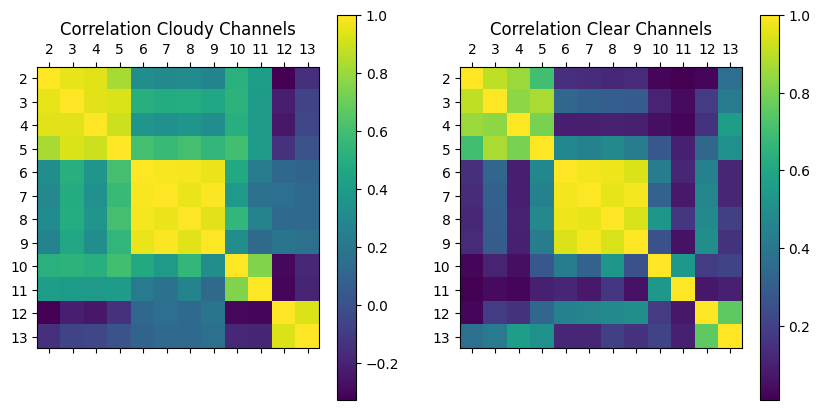

In [12]:
plt.rcParams["figure.figsize"] = [10, 5]
fig, (ax1, ax2) = plt.subplots(1,2)
fig_1=ax1.matshow(data_all[cloudy_columns].corr())
fig_2=ax2.matshow(data_all[clear_columns].corr())
fig.colorbar(fig_1,ax=ax1)
fig.colorbar(fig_2,ax=ax2)

#Set titles
ax1.title.set_text('Correlation Cloudy Channels')
ax2.title.set_text('Correlation Clear Channels')

#Set ticks subplot 1
ax1.set_xticks(range(0,12))
ax1.set_yticks(range(0,12))
ax1.set_xticklabels(range(2,14))
ax1.set_yticklabels(range(2,14))

ax2.set_xticks(range(0,12))
ax2.set_yticks(range(0,12))
ax2.set_xticklabels(range(2,14))
ax2.set_yticklabels(range(2,14))

plt.show()

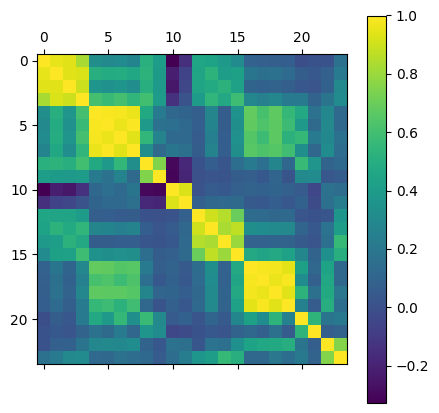

In [13]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.matshow(data_all[channel_columns].corr())
plt.colorbar()

## Eigenvalue decomposition

In [14]:
cloudy_cov=data_all[cloudy_columns].corr()
[U,S,V]=np.linalg.svd(cloudy_cov)

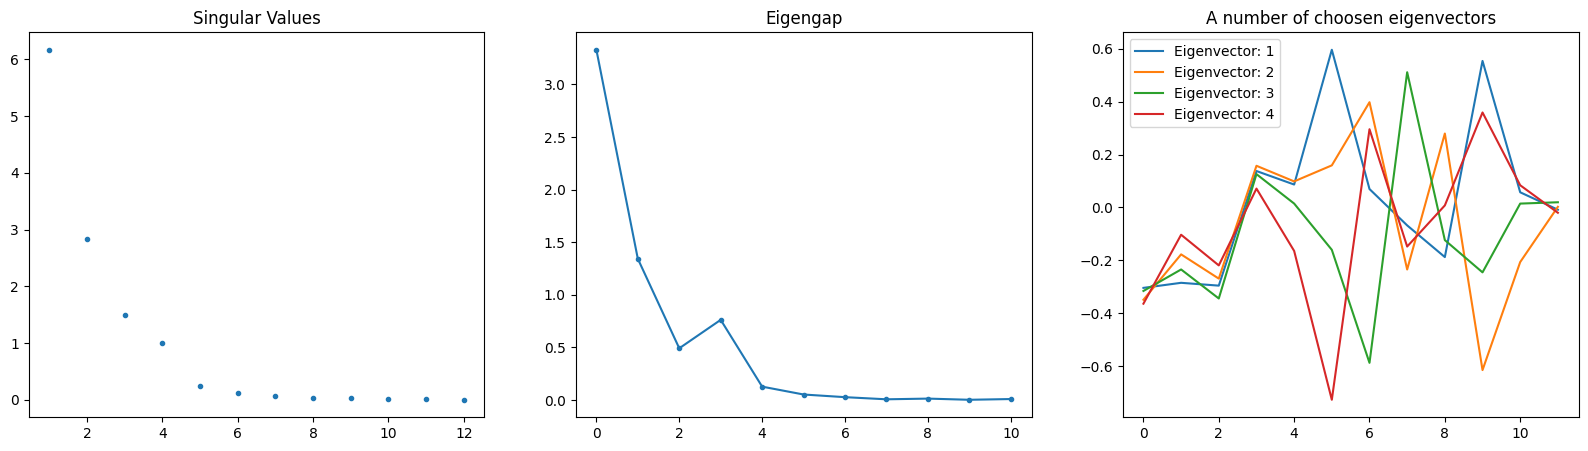

In [15]:
x=[i+1 for i in range(12)]
plt.rcParams["figure.figsize"] = [20, 5]
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.plot(x,S,'.')
ax1.title.set_text('Singular Values')


ax2.plot(S[0:-1]-S[1:],'.-')
ax2.title.set_text('Eigengap')

num_eigenvecs=4
ax3.plot(V[:,0:num_eigenvecs])
ax3.title.set_text('A number of choosen eigenvectors')
ax3.legend(["Eigenvector: "+str(i+1) for i in range(num_eigenvecs)])
plt.show()

### Seems to be a large gap between singular values 4 and 5. Do we then have about 4 independent channels?

## PCA

In [32]:
input_output_variables=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05', 'Cloud_B06',
                        'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10', 'Cloud_B11',
                        'Cloud_B12', 'Cloud_B13', 'Sat_Zenith_Angle',
                        'Sun_Zenith_Angle', 'Azimuth_Diff_Angle',
                        'Clear_B02','Clear_B03','Clear_B04','Clear_B05','Clear_B06',
                        'Clear_B07','Clear_B08','Clear_B09','Clear_B10','Clear_B11',
                        'Clear_B12','Clear_B13']
input_variables=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05', 'Cloud_B06',
                        'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10', 'Cloud_B11',
                        'Cloud_B12', 'Cloud_B13', 'Sat_Zenith_Angle',
                        'Sun_Zenith_Angle', 'Azimuth_Diff_Angle']

variables=input_variables
X=data_all[variables].copy()
co=np.dot(X.T,X)
eigvals,eigvecs=np.linalg.eig(co)
e_indices = np.argsort(eigvals)[::-1]
eigvecs_sort=np.real(eigvecs[:,e_indices])
eigvals_sort=np.real(eigvals[e_indices])

In [33]:
explained_variance=[]
for i in eigvals:
    explained_variance.append((i/sum(eigvals)))

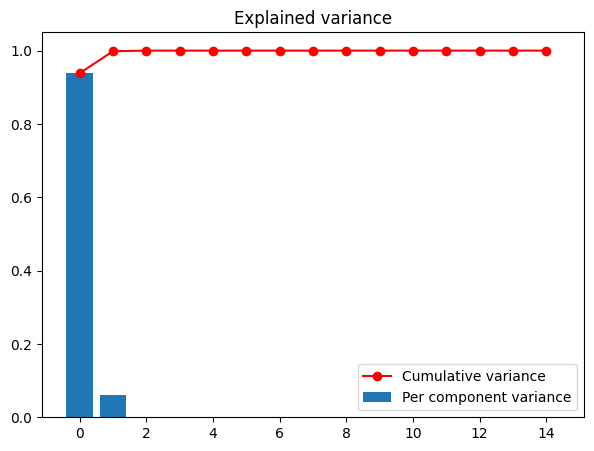

In [34]:
num=len(variables)
plt.rcParams["figure.figsize"] = [7, 5]
plt.bar(range(np.size(explained_variance[0:num])),height=explained_variance[0:num])
plt.plot(np.cumsum(explained_variance),'ro-')
plt.title('Explained variance')
plt.xticks(range(0,len(variables),2))
plt.legend(['Cumulative variance','Per component variance'])
plt.show()

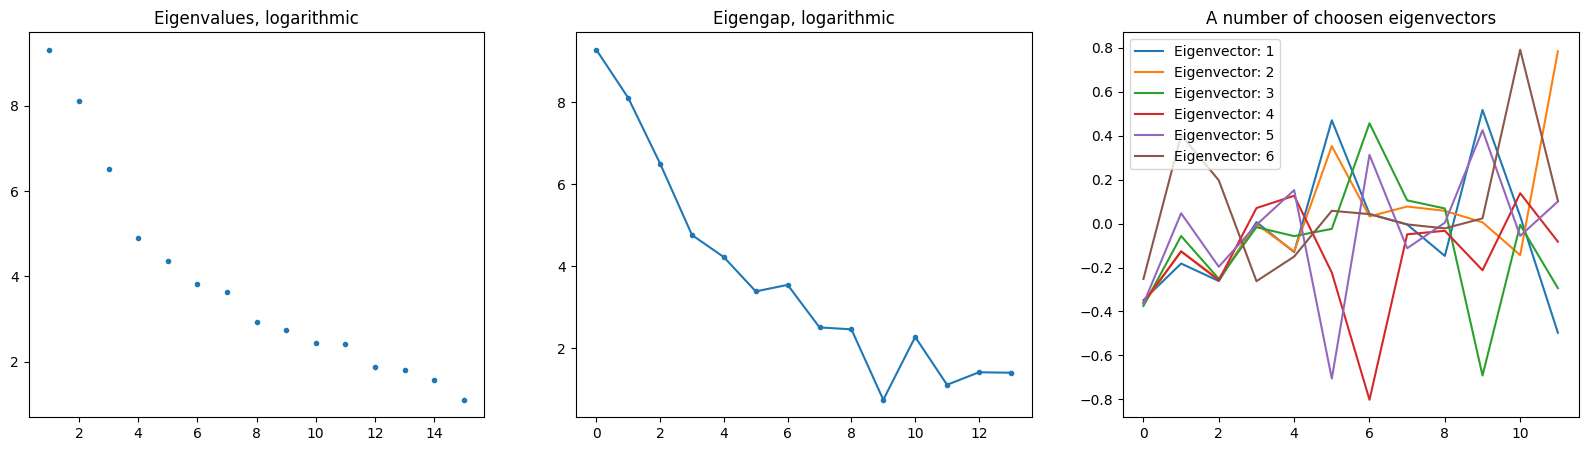

In [35]:
x=[i+1 for i in range(len(eigvals_sort))]
plt.rcParams["figure.figsize"] = [20, 5]
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.plot(x,np.log10(eigvals_sort),'.')
ax1.title.set_text('Eigenvalues, logarithmic')


ax2.plot(np.log10(eigvals_sort[0:-1]-eigvals_sort[1:]),'.-')
ax2.title.set_text('Eigengap, logarithmic')

num_eigenvecs=6
ax3.plot(V[:,0:num_eigenvecs])
ax3.title.set_text('A number of choosen eigenvectors')
ax3.legend(["Eigenvector: "+str(i+1) for i in range(num_eigenvecs)])
plt.show()